# Logistic regression mdoel代码大全

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import statsmodels.api as sm

In [2]:
file = "/Users/zhang/Documents/2018/R大数据实战教程/模型预测/dt.csv"
dt = pd.read_csv(file)
dt.head()

,age,gender,lac,type,vaso,wbc,crp,mort
0,62,male,7.6,surgery,No,6.5,NaN,1
1,67,male,4.3,medical,Yes,NaN,141.1,1
2,93,male,5.5,surgery,No,9.3,37.0,1
3,71,female,4.9,emergency,No,4.4,NaN,1
4,72,female,4.1,medical,No,12.3,212.7,1


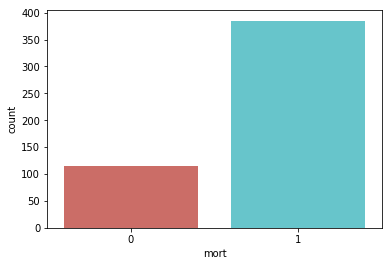

In [3]:
#两组间比较的可视化
sb.countplot(x='mort',data=dt, palette='hls')

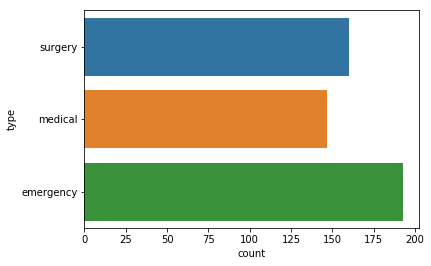

In [4]:
import matplotlib.pyplot as plt 
sb.countplot(y="type", data=dt)
plt.show()

In [5]:
dt.isnull().sum()

age         0
gender      0
lac        37
type        0
vaso        0
wbc        96
crp       115
mort        0
dtype: int64

In [6]:
dt.tail()
dt.dtypes

age         int64
gender     object
lac       float64
type       object
vaso       object
wbc       float64
crp       float64
mort        int64
dtype: object

In [7]:
#imputation for missing values
dtcom = dt.fillna(method='pad')
ColMean = dtcom.select_dtypes(exclude='object').apply(np.mean)
ColMean
dtcom = dtcom.fillna(value=ColMean)
dtcom.isnull().sum()
dtcom.tail()

,age,gender,lac,type,vaso,wbc,crp,mort
495,50,female,5.8,emergency,Yes,0.5,93.9,1
496,73,female,4.9,surgery,Yes,12.1,139.4,1
497,72,male,5.6,emergency,No,8.5,47.3,1
498,75,female,7.3,medical,No,8.5,279.5,1
499,78,male,5.3,medical,No,2.3,279.5,1


In [8]:
import statsmodels.api as sm
import pylab as pl 

In [9]:
#data exploration
pd.crosstab(dt['mort'], dt['type'], rownames=['mort'])

type,emergency,medical,surgery
mort,,,
0,38,21,56
1,155,126,104


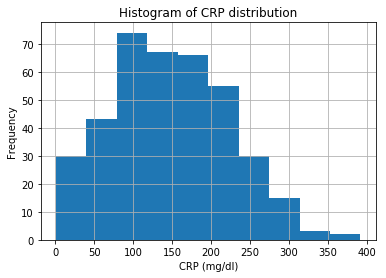

In [10]:
# plot one column
dt['crp'].hist()
pl.title('Histogram of CRP distribution')
pl.xlabel('CRP (mg/dl)')
pl.ylabel('Frequency')
pl.show()

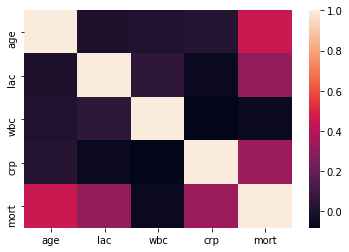

In [11]:
sb.heatmap(dt.corr())  

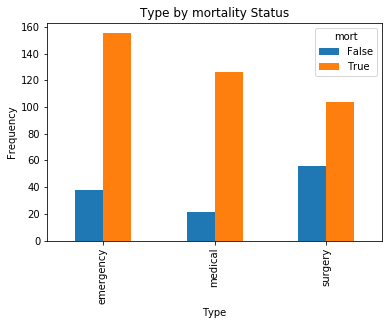

In [12]:
# barplot of WBC grouped by discharge status (True or False)
pd.crosstab(dtcom.type, dtcom.mort.astype(bool)).plot(kind='bar')
pl.title('Type by mortality Status')
pl.xlabel('Type')
pl.ylabel('Frequency')
pl.show()

In [13]:
import scipy

In [14]:
#Univariate description(best to output a publicaion-style table)
gvar = 'mort'
VarContNor = ['age','crp','lac']
mean=dtcom.groupby(gvar)[VarContNor].mean()
sd=dtcom.groupby(gvar)[VarContNor].std()
mean = mean.round(2).astype(str)
sd = sd.round(2).astype(str)
dtNor = pd.DataFrame(mean+u"\u00B1"+sd).T
# create an empty dictionary
t_test_results = {}
# loop over column_list and execute code explained above
for column in VarContNor:
    group1 = dtcom.where(dtcom[gvar]== 0).dropna()[column]
    group2 = dtcom.where(dtcom[gvar]== 1).dropna()[column]
    # add the output to the dictionary 
    t_test_results[column] = scipy.stats.ttest_ind(group1,group2)
results_df = pd.DataFrame.from_dict(t_test_results,orient='Index')
results_df.columns = ['statistic','pvalue']
results_df.pvalue.where(results_df.pvalue<0.001,
                        results_df.pvalue.round(3),inplace=True)
results_df.pvalue.where(results_df.pvalue>=0.001,'<0.001',inplace=True)#need to apply to only the pvalue column
DtNor = dtNor.join(results_df)
DtNor

,0,1,statistic,pvalue
age,58.48±11.43,74.13±13.51,-11.274240,<0.001
crp,108.77±57.57,157.75±76.2,-6.370446,<0.001
lac,3.73±1.87,5.08±1.88,-6.765038,<0.001


In [17]:
VarContSkew = ['wbc','crp']
median = dtcom.groupby(gvar)[VarContSkew].median()
median = median.round(2).astype(str)
iqr = dtcom.groupby(gvar)[VarContSkew].quantile([0.25,0.75])
iqr = iqr.round(2).astype(str)
print(iqr)
dtSkewIQR = iqr.apply(lambda x: ['('+x.iloc[0]+','+x.iloc[1]+')',
                                 '('+x.iloc[2]+','+x.iloc[3]+')'],result_type='expand')
dtSkew = (median+' '+dtSkewIQR).T
dtSkew
wilcoxon_test_results = {}
# loop over column_list and execute code explained above
for column in VarContSkew:
    group1 = dtcom.where(dtcom[gvar]== 0).dropna()[column]
    group2 = dtcom.where(dtcom[gvar]== 1).dropna()[column]
    # add the output to the dictionary 
    wilcoxon_test_results[column] = scipy.stats.mannwhitneyu(group1,group2)
results_df = pd.DataFrame.from_dict(wilcoxon_test_results,orient='Index')
results_df.columns = ['statistic','pvalue']
results_df.pvalue.where(results_df.pvalue<0.001,
                        results_df.pvalue.round(3),inplace=True)
results_df.pvalue.where(results_df.pvalue>=0.001,
                        '<0.001',inplace=True)#need to apply to only the pvalue column
DtSkew = dtSkew.join(results_df)
DtSkew

            wbc    crp
mort                  
0    0.25   6.8   66.1
     0.75  14.3  150.9
1    0.25   6.8  101.1
     0.75  13.1  212.0


,0,1,statistic,pvalue
wbc,"10.6 (6.8,14.3)","9.8 (6.8,13.1)",20795.5,0.162
crp,"111.7 (66.1,150.9)","156.2 (101.1,212.0)",13801.0,<0.001


SyntaxError: invalid syntax (<ipython-input-16-385bd046f0c2>, line 1)

In [18]:
#categorical variable
VarCat = ['type','gender']
dtFreq =pd.DataFrame()
for var in VarCat:
    tabfreq = pd.crosstab(dtcom[var],dtcom[gvar])
    chisq = scipy.stats.chi2_contingency(tabfreq,correction=True)[0:2]# apply Yates’ correction for continuity
    chisq_mu = list(chisq)#transform to mutable list
    if chisq_mu[1]< 0.001:
       chisq_mu[1]='<0.001' 
    elif chisq_mu[1]>= 0.001:
       chisq_mu[1]=chisq[1].round(3)
    tabpercent = (tabfreq.apply(lambda r: r/r.sum())*100).round(1)
    tabfreq_str = tabfreq.astype(str)+'('+tabpercent.astype(str)+')'
    tabP_blank = tabfreq_str.replace(regex='.',value=' ')
    tabfreq_blank = pd.DataFrame([' ',' '],columns=[var]).T.append(tabfreq_str)
    tabP = pd.DataFrame(chisq_mu,columns=[var],).T.append(tabP_blank)
    tabP.columns= ['statistic','pvalue']
    tabfreqP = tabfreq_blank.join(tabP)
    dtFreq = dtFreq.append(tabfreqP)
dtFreq

,0,1,statistic,pvalue
type,,,20.5074,<0.001
emergency,38(33.0),155(40.3),,
medical,21(18.3),126(32.7),,
surgery,56(48.7),104(27.0),,
gender,,,0.00325376,0.955
female,44(38.3),144(37.4),,
male,71(61.7),241(62.6),,


In [19]:
#combine all analysis together
Tab1 = dtFreq.append(DtSkew).append(DtNor)
Tab1 

,0,1,statistic,pvalue
type,,,20.5074,<0.001
emergency,38(33.0),155(40.3),,
medical,21(18.3),126(32.7),,
surgery,56(48.7),104(27.0),,
gender,,,0.00325376,0.955
female,44(38.3),144(37.4),,
male,71(61.7),241(62.6),,
wbc,"10.6 (6.8,14.3)","9.8 (6.8,13.1)",20795.5,0.162
crp,"111.7 (66.1,150.9)","156.2 (101.1,212.0)",13801,<0.001
age,58.48±11.43,74.13±13.51,-11.2742,<0.001


In [20]:
# dummify categorical variables
dummy_ranks = pd.get_dummies(dtcom[['type','gender','vaso']], prefix='type')
print(dummy_ranks.head())
# create a clean data frame for the regression
cols_to_keep = ['mort', 'age', 'wbc']
data = dtcom[cols_to_keep].join(dummy_ranks.drop(['type_emergency','type_female','type_No'],
                                                axis=1))#drop baseline level of categorical variables
data.head()

   type_emergency  type_medical  type_surgery  type_female  type_male  \
0               0             0             1            0          1   
1               0             1             0            0          1   
2               0             0             1            0          1   
3               1             0             0            1          0   
4               0             1             0            1          0   

   type_No  type_Yes  
0        1         0  
1        0         1  
2        1         0  
3        1         0  
4        1         0  


,mort,age,wbc,type_medical,type_surgery,type_male,type_Yes
0,1,62,6.5,0,1,1,0
1,1,67,6.5,1,0,1,1
2,1,93,9.3,0,1,1,0
3,1,71,4.4,0,0,0,0
4,1,72,12.3,1,0,0,0


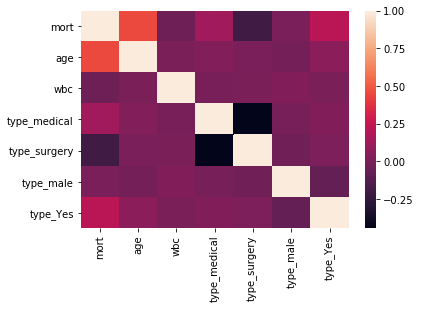

In [21]:
#Check the independence between the independent variables
sb.heatmap(data.corr())
plt.show()

In [22]:
# manually add the intercept
data['intercept'] = 1.0
data.loc[:,"age":].head()

,age,wbc,type_medical,type_surgery,type_male,type_Yes,intercept
0,62,6.5,0,1,1,0,1.0
1,67,6.5,1,0,1,1,1.0
2,93,9.3,0,1,1,0,1.0
3,71,4.4,0,0,0,0,1.0
4,72,12.3,1,0,0,0,1.0


In [23]:
#Logistic Regression
logit = sm.Logit(data['mort'], data.loc[:,"age":])

In [24]:
# fit the model and output a publication style Table using statsmodels
glm_binom = sm.GLM(data['mort'], data.loc[:,"age":], family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())
params = res.params
conf = res.conf_int()
conf['OR'] = params
conf.columns = ['OR','2.5%', '97.5%']
dtOR = np.exp(conf).round(3)
dtOR_str = dtOR['OR'].astype(str)+'('+dtOR['2.5%'].astype(str)+','+dtOR['97.5%'].astype(str)+')'
dtOR_str =pd.DataFrame(dtOR_str,columns=['OR(95%CI)'])
dtP = pd.DataFrame(res.pvalues).round(4)
dtP.where(dtP>=0.001,"<0.001",inplace=True)
dtP.columns = ["pvalue"]
dtOR_str.join(dtP)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   mort   No. Observations:                  500
Model:                            GLM   Df Residuals:                      493
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -184.73
Date:                Tue, 11 Jun 2019   Deviance:                       369.47
Time:                        20:32:21   Pearson chi2:                     425.
No. Iterations:                     6   Covariance Type:             nonrobust
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
age              0.1077      0.012      8.719      0.000       0.084       0.132
wbc             -0.0241      0.028     -0.855 

,OR(95%CI),pvalue
age,"1.087(1.141,1.114)",<0.001
wbc,"0.924(1.032,0.976)",0.3924
type_medical,"0.669(2.667,1.336)",0.4118
type_surgery,"0.154(0.509,0.28)",<0.001
type_male,"0.688(2.016,1.178)",0.5499
type_Yes,"2.463(10.133,4.995)",<0.001
intercept,"0.001(0.019,0.003)",<0.001


In [25]:
#calibration plot
Ngroup=20
dtObs_Est = pd.DataFrame({'Yobs':data.mort,'Yest':res.mu})
dtObs_Est['groups']=pd.qcut(dtObs_Est.Yest, Ngroup,labels=range(Ngroup))
dtObs_EstAgg =dtObs_Est.groupby('groups',as_index=False).agg({
    'Yest':{
        'YestP': 'mean',
        'YestN': lambda x: sum(x)
    },
    'Yobs':{
        'YobsP': lambda x: sum(x)/len(x),
        'YobsN': lambda x: sum(x),
        'TotalN': lambda x: len(x)
    }   
}) 
dtObs_EstAgg

/Users/zhang/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


groups      Yest             Yobs             
              YestP      YestN YobsP YobsN TotalN
0       0  0.151109   3.777726  0.20     5     25
1       1  0.313599   7.839977  0.44    11     25
2       2  0.428740  10.718489  0.44    11     25
3       3  0.513011  12.825274  0.32     8     25
4       4  0.588244  14.706094  0.52    13     25
5       5  0.660100  16.502503  0.72    18     25
6       6  0.732706  18.317648  0.72    18     25
7       7  0.776239  19.405969  0.72    18     25
8       8  0.824483  20.612070  0.84    21     25
9       9  0.854769  21.369230  0.92    23     25
10     10  0.889821  22.245525  0.84    21     25
11     11  0.916520  22.913002  0.96    24     25
12     12  0.932222  23.305540  0.92    23     25
13     13  0.948136  23.703407  0.92    23     25
14     14  0.957331  23.933263  0.96    24     25
15     15  0.966568  24.164206  0.96    24     25
16     16  0.975653  24.391315  1.00    25     25
17     17  0.983424  24.585588  1.00    25     25
18     18  0.990861  24.771526  1.00    25     25
19     19  0.996466  24.911649  1.00    25     25

/Users/zhang/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


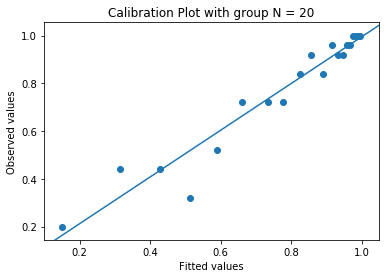

In [26]:
from statsmodels.graphics.api import abline_plot
fig, ax = plt.subplots()
ax.scatter(dtObs_EstAgg.Yest.YestP, dtObs_EstAgg.Yobs.YobsP)
line_fit = sm.OLS(dtObs_EstAgg.Yobs.YobsP, 
                  sm.add_constant(dtObs_EstAgg.Yest.YestP, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)
ax.set_title('Calibration Plot with group N = 20')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

Math for the Homser-Lemeshow test
Data is first regrouped by ordering the predicted probabilities and forming the number of groups, g.
The Hosmer-Lemeshow test statistic is calculated with the following formula:
\begin{align}
G_{HL}^2  = \sum_{j=1}^g \frac{(O_j-E_j)^2}{E_j(1-\frac{E_j}{n_j})}  \sim \chi_{g-2}^2 \\
\end{align}
where $g$ denotes the number of groups, and $j$ refers to a specific group; $ O_j $ is the observed number of event in group $j$; $E_j$ is the expected number of event in group $j$; and $n_j$ is the total number of patients in group $j$. The degree of freedom for the $\chi^2$ distribution is $g-2$.

In [27]:
#Homser-Lemeshow test from scratch
from scipy.stats import chi2
HL=((dtObs_EstAgg.Yobs.YobsN-dtObs_EstAgg.Yest.YestN)**2/
    (dtObs_EstAgg.Yest.YestN*(1-dtObs_EstAgg.Yest.YestN/dtObs_EstAgg.Yobs.TotalN))).sum()
HL
pvalue=1-chi2.cdf(HL,Ngroup-2)
print('p value for HL test:' + pvalue.astype(str))

p value for HL test:0.8751530946877285


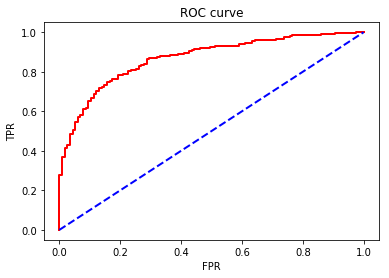

In [41]:
#Discrimination AUC
from sklearn import metrics
import pandas as pd

fpr, tpr, _ = metrics.roc_curve(data.mort, res.mu)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [44]:
!pip install dcapy

  Could not find a version that satisfies the requirement dcapy (from versions: )
No matching distribution found for dcapy


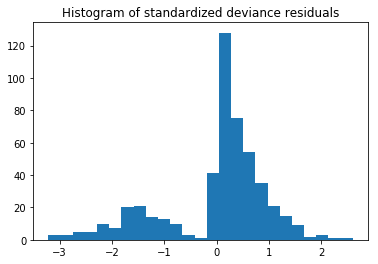

In [30]:
from scipy import stats

fig, ax = plt.subplots()

resid = res.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histogram of standardized deviance residuals');

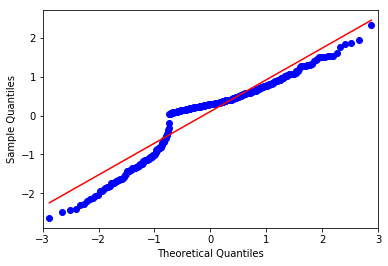

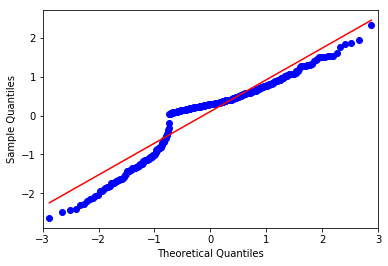

In [31]:
from statsmodels import graphics
graphics.gofplots.qqplot(resid, line='r')